In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
# plt.style.use("dark_background")
plt.style.use("ggplot")
plt.rc('font', family='Malgun Gothic')
pd.set_option('display.max_columns', None)

In [17]:
dataset = pd.read_excel("영화 데이터.xlsx")
dataset.shape

(40940, 18)

In [18]:
# 누적관객수, 스크린수, 상영횟수 1이하 데이터 제거 (없는 데이터가 많음)
dataset.drop(dataset[(dataset['누적관객수']<=1) & (dataset['스크린수']<=1) & (dataset['상영횟수']<=1)].index, inplace=True)

In [19]:
# 누적매출액이 0인 데이터 제거 (마찬가지로 없는 데이터가 많음)
dataset.drop(dataset[dataset['누적매출액'] == 0].index, inplace=True)

In [20]:
dataset.shape

(32040, 18)

In [21]:
# 영화 개봉 후 발생하는 데이터 제거
dataset = dataset.drop(['순위', '매출액', '점유율', '관객수', '누적관객수', '스크린수', '상영횟수', '국적'], axis=1)

In [22]:
dataset.dtypes

영화명              object
개봉일      datetime64[ns]
누적매출액             int64
대표국적             object
제작사              object
배급사              object
등급               object
장르               object
감독               object
배우               object
dtype: object

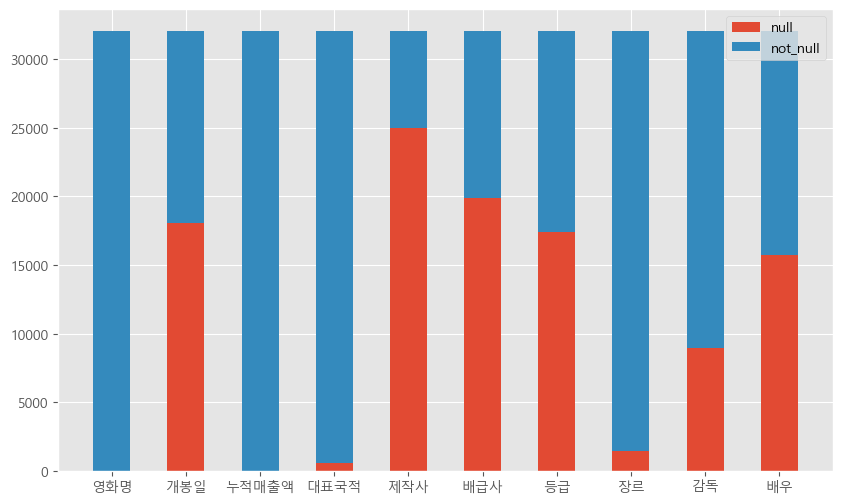

In [23]:
# 결측치 비교

null = dataset.isnull().sum()
not_null = dataset.notnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(dataset.columns, null, label='null', width=0.5)
plt.bar(dataset.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [24]:
df = dataset.copy()
df.shape

(32040, 10)

<Axes: xlabel='대표국적'>

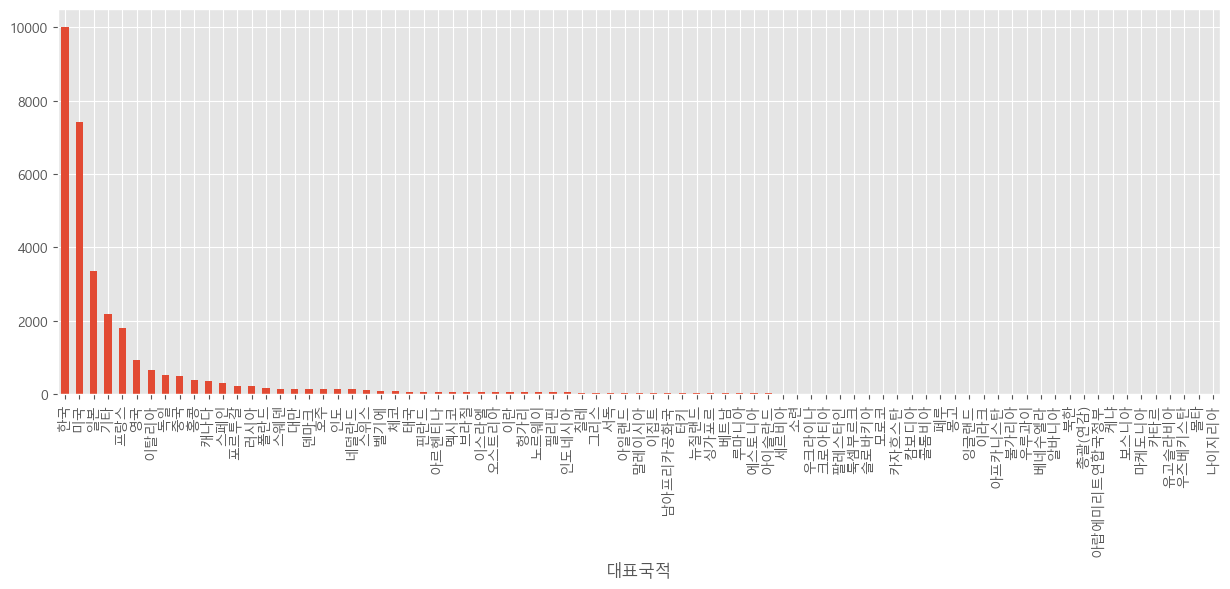

In [25]:
# 대표국적은 한국, 미국, 일본이 대부분을 차지

plt.figure(figsize=(15, 5))
df['대표국적'].value_counts().plot(kind='bar')

In [26]:
# 한국, 미국, 일본, 프랑스, 영국 외 국적은 기타로 처리 (top5 국적)

df['대표국적'][~df['대표국적'].isin(['한국', '미국', '일본', '프랑스', '영국'])] = '기타'

C:\Users\USER\AppData\Local\Temp\ipykernel_20756\289791037.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['대표국적'][~df['대표국적'].isin(['한국', '미국', '일본', '프랑스', '영국'])] = '기타'
C:\Users\USER\AppData\Local\Temp\ipykernel_20756\289791037.py

<Axes: xlabel='대표국적'>

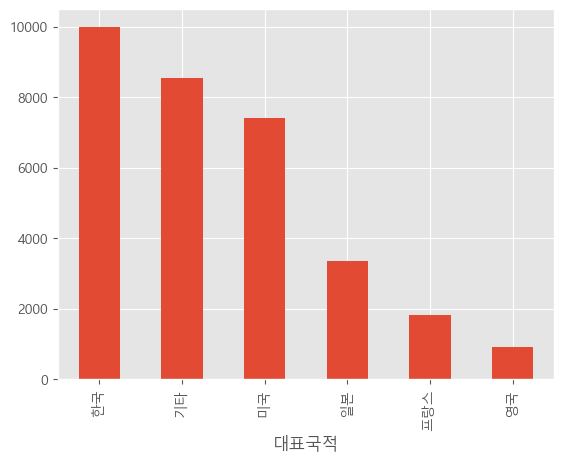

In [27]:
df['대표국적'].value_counts().plot(kind='bar')

In [28]:
# 관람 등급 1개만 남김
df['등급'] = df['등급'].str.split(',').str[0]
print(df['등급'].unique())

# 같은 등급이지만 다르게 적힌 등급을 통일
# 전체관람가 = 0
# 12세 이상 관람가 = 12
# 15세 이상 관감가 = 15
# 청소년 관람불가 = 18
# 결측치 = -1

df['등급'][df['등급'].isin(['전체관람가', '연소자관람가', '미성년자관람가', '모든 관람객이 관람할 수 있는 등급', '기타', '미정'])] = 0
df['등급'][df['등급'].isin(['12세관람가', '12세이상관람가', '중학생이상관람가', '12세 미만인 자는 관람할 수 없는 등급', '국민학생관람불가'])] = 12
df['등급'][df['등급'].isin(['15세관람가', '15세이상관람가', '고등학생이상관람가', '15세 미만인 자는 관람할 수 없는 등급'])] = 15
df['등급'][df['등급'].isin(['18세관람가', '청소년관람불가', '18세 미만인 자는 관람할 수 없는 등급', '미성년자관람불가', '연소자관람불가'])] = 18
df['등급'].fillna(-1, inplace=True)
df['등급'] = df['등급'].astype(int)

['15세관람가' '12세관람가' '전체관람가' '12세이상관람가' '18세관람가' nan '고등학생이상관람가' '연소자관람불가'
 '15세이상관람가' '청소년관람불가' '연소자관람가' '18세 미만인 자는 관람할 수 없는 등급'
 '15세 미만인 자는 관람할 수 없는 등급' '중학생이상관람가' '기타' '모든 관람객이 관람할 수 있는 등급'
 '12세 미만인 자는 관람할 수 없는 등급' '국민학생관람불가' '미성년자관람불가' '미정' '미성년자관람가']


C:\Users\USER\AppData\Local\Temp\ipykernel_20756\3535945008.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['등급'][df['등급'].isin(['전체관람가', '연소자관람가', '미성년자관람가', '모든 관람객이 관람할 수 있는 등급', '기타', '미정'])] = 0
C:\Users\USER\AppData\Local\Temp\

<Axes: xlabel='등급'>

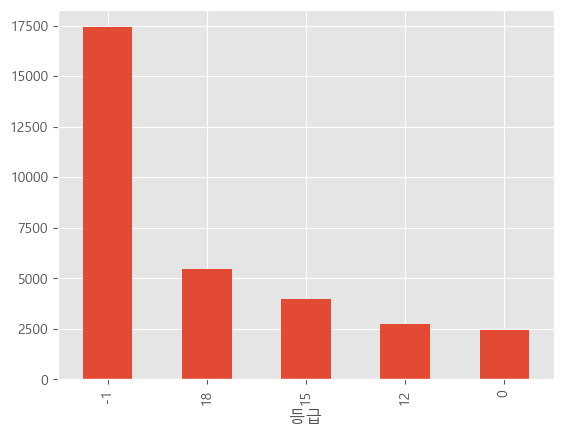

In [29]:
# 등급 분포
df['등급'].value_counts().plot(kind='bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_20756\1438712143.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['개봉일'].fillna('1900-01-01', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_20756\1438712143.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

['영화명', '대표국적', '배급사', '감독']


C:\Users\USER\AppData\Local\Temp\ipykernel_20756\1438712143.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(label_actors.set_index('배우').to_dict()['index'])
C:\Users\USER\AppData\Local\Temp\ipykernel_20756\1438712143.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


 

,영화명,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,년,월,일,요일,휴일,코로나
0,22106,15687180500,5,38,15,122,16017,23807,7748,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2004,2,5,3,0,0
1,22412,12777346000,1,501,15,3000,14113,11812,16009,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2004,5,21,4,0,0
2,5721,11919939500,5,316,12,5409,6004,17708,15036,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,11,5,4,0,0
3,4442,11898748500,5,145,12,529,1265,2632,1766,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2004,9,17,4,0,0
4,22342,11658584500,1,521,12,1741,22877,10926,15328,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,6,3,3,0,0


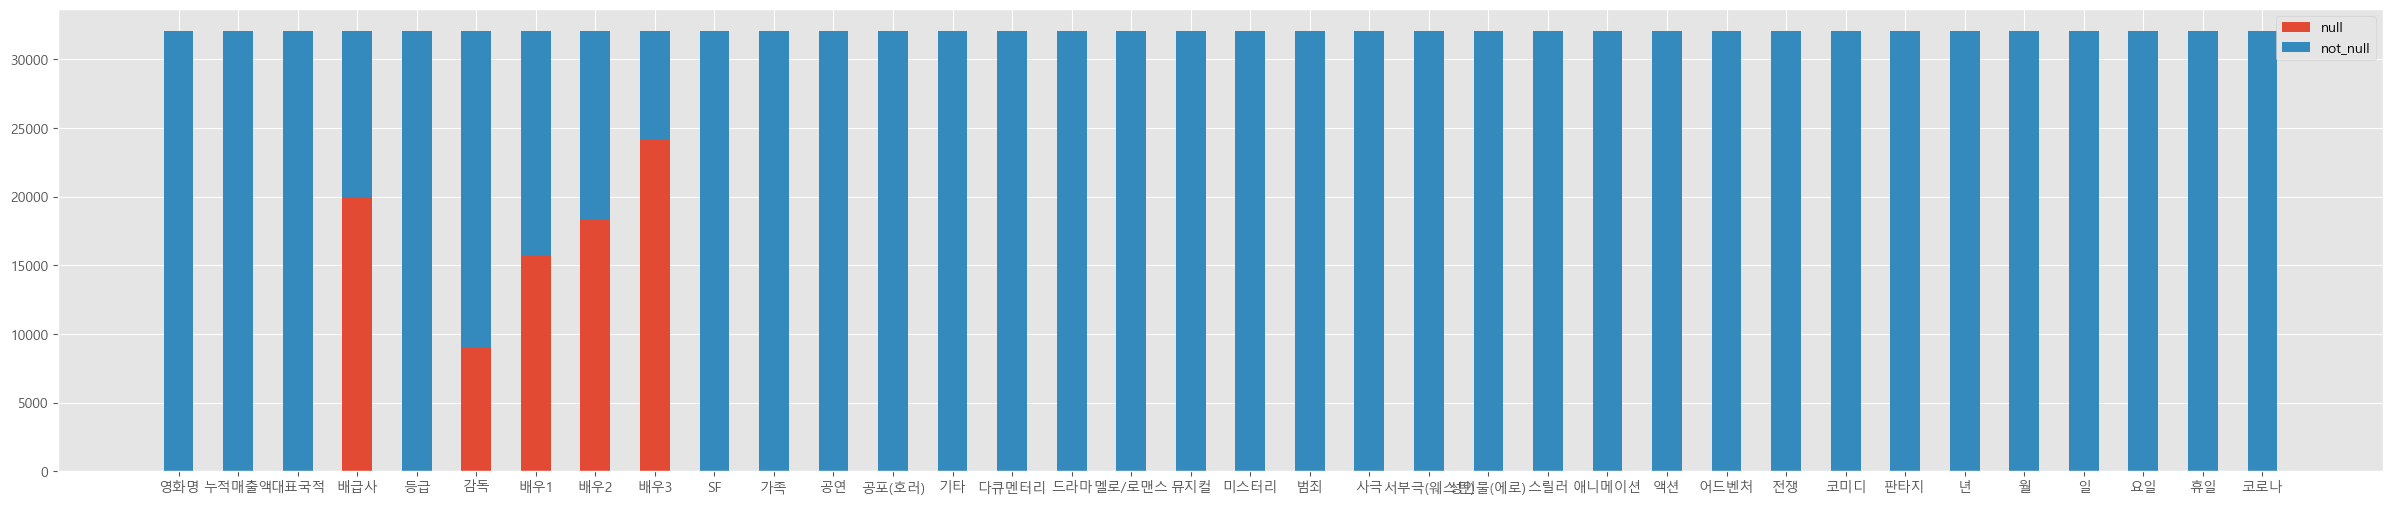

In [30]:
from sklearn.preprocessing import LabelEncoder
import holidays

# 제작사 결측치가 대부분이라서 삭제
df = df.drop(['제작사'], axis=1)

# 배우 3명까지만 새로운 열로 추가하고 기존 배우 열 삭제
for i in range(1, 4):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]
df.drop(['배우'], axis=1, inplace=True)

# 원-핫 인코딩, 장르를 더미변수로 생성하고 기존 장르 열 삭제
genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df.drop(['장르'], axis=1, inplace=True)

# 감독 1명만 남김
df['감독'] = df['감독'].str.split(',').str[0]

# 배급사 1개만 남김
df['배급사'] = df['배급사'].str.split(',').str[0]

# 개봉일 결측치
df['개봉일'].fillna('1900-01-01', inplace=True)

# 개봉일을 년 / 월 / 일 / 요일로 분리하고 기존 개봉일 열 삭제
df['년'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month
df['일'] = df['개봉일'].dt.day
df['요일'] = df['개봉일'].dt.weekday    # 0 = 월요일 ~

# 한국 공휴일 or 주말 = 1, 아니면 0
kr_holidays = holidays.KR() 
df['휴일'] = df['개봉일'].apply(lambda x: 1 if (x.weekday() in [5, 6] or x in kr_holidays) else 0)

# 코로나로 인한 거리두기 시기
df['코로나'] = df['개봉일'].apply(lambda x: 1 if (x.year in [2020, 2021]) else 0)

df.drop(['개봉일'], axis=1, inplace=True)
# 널 값 비율 그래프
null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(30, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

# 라벨 인코딩, 카테고리 변수 수치형으로 변환
categories = ['영화명', '대표국적', '배급사', '감독']
print(categories)

for cat in categories:
    le = LabelEncoder()
    df[cat].fillna("missing", inplace=True)
    df[cat] = df[cat].astype(str)

    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])

# 배우 따로 변환
label_actors = pd.read_csv("label_actors.csv")

for col in ['배우1', '배우2', '배우3']:
    df[col].fillna("missing", inplace=True)
    df[col] = df[col].replace(label_actors.set_index('배우').to_dict()['index'])

# 전처리한 데이터 복사
all_df = df.copy()
all_df.head()

In [ ]:
# df[['영화명', '대표국적', '배급사', '감독']].to_csv("labelData.csv")

In [35]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = all_df.drop(["누적매출액"], axis=1)  # 독립 변수
y = all_df["누적매출액"]                # 종속 변수

folds = 20
kf = KFold(n_splits=folds)

models = []             # fold 별로 작성한 모델을 저장
oof = np.zeros(len(X))  # 해당 데이터를 제외한 나머지 데이터를 이용하여 종속 변수를 예측한 값을 저장
mse = []
mae = []
scores = []

lgbm_params = {
    "objective" : "regression",
    'num_leaves': 63,
    'max_bin': 120,
    'bagging_fraction': 0.8883805440951686,
    'bagging_freq': 7,
    'feature_fraction': 0.7696317896991509,
    'min_data_in_leaf': 2,
    'min_sum_hessian_in_leaf': 3,
    'verbose': -1}

for train_index, val_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_valid = X.iloc[val_index]
    y_train = y.iloc[train_index]
    y_valid = y.iloc[val_index]

    model = LGBMRegressor(**lgbm_params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
  
    scores.append(model.score(X_valid, y_valid))

    mse.append(mean_squared_error(y_valid, y_pred))
    mae.append(mean_absolute_error(y_valid, y_pred))

    models.append(model)
    oof[val_index] = y_pred

mean_score = np.mean(scores)
mean_mse = np.mean(mse)
mean_mae = np.mean(mae)

print("----------------------------------------------------------------------------------------------------------------------------------------------------")
print("평균 결정계수:", mean_score)
print("평균 MSE:", mean_mse)
print("평균 MAE:", mean_mae)

----------------------------------------------------------------------------------------------------------------------------------------------------
평균 결정계수: 0.8304857673760655
평균 MSE: 9.609104908317608e+18
평균 MAE: 868706120.3399429


In [ ]:
# fold 10
# 평균 결정계수: 0.8255444307517772
# 평균 MSE: 9.87757677759372e+18
# 평균 MAE: 887144850.0769651
# 학습 데이터 점수: 0.9667683408233847
# 검증 데이터 점수: 0.8255444307517772

# fold 20
# 평균 결정계수: 0.8304857673760655
# 평균 MSE: 9.609104908317608e+18
# 평균 MAE: 868706120.3399429
# 학습 데이터 점수: 0.9666005439743579
# 검증 데이터 점수: 0.8304857673760655

<Axes: >

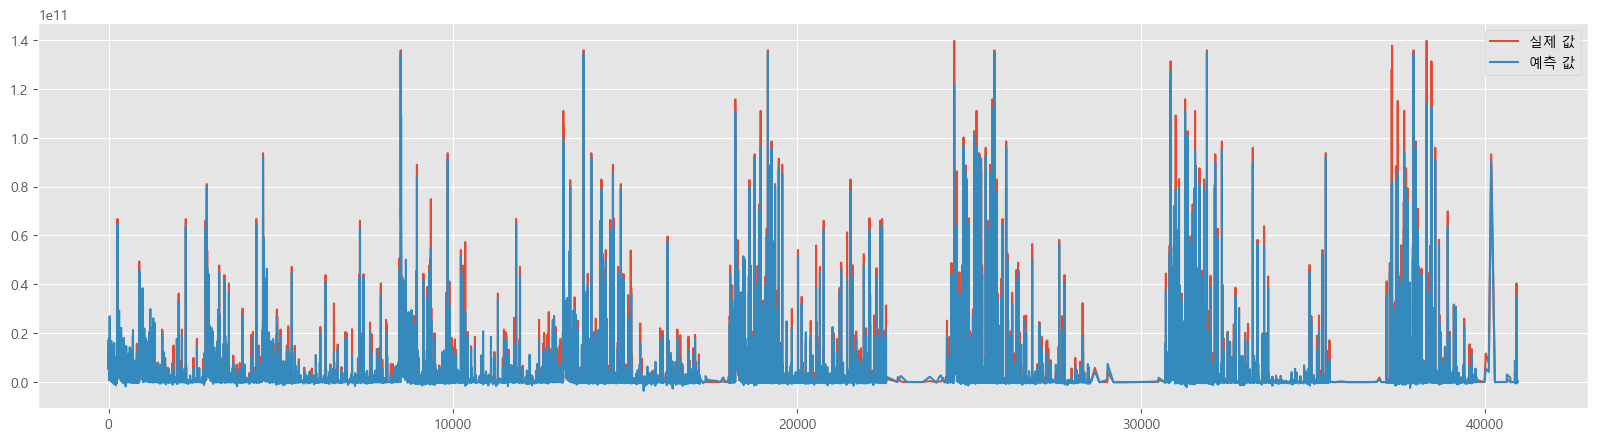

In [33]:
graph = pd.DataFrame({
    "실제 값" : y,
    "예측 값": oof
})

graph.plot(figsize=(20, 5))

In [ ]:
# 각 변수의 중요도 확인

for model in models:
    plt.figure(figsize=(25, 5))
    plt.bar(X.columns, model.feature_importances_, width=0.5)
    plt.show()

In [34]:
# 모델 저장
# for i, model in enumerate(models):
#     joblib.dump(model, f'lgbm_models2/lgbm_model{i}.pkl')

In [ ]:
# 하이퍼 파라미터 튜닝

import optuna
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

def objective(trial):
    params = {
        'objective': 'regression',
        'random_seed' : 1234,
        'learning_rate' : 0.05,
        'n_estimators' : 1000,
        'num_leaves': trial.suggest_int('num_leaves', 4, 64),
        'max_bin' : trial.suggest_int('max_bin', 50, 200),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.9),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 2, 16),
        'min_sum_hessian_in_leaf' : trial.suggest_int('min_sum_hessian_in_leaf', 1, 10),
    }

    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
        
    y_pred = model.predict(X_valid)

    score = mean_squared_error(y_valid, y_pred)
    return score

# study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
# study.optimize(objective, n_trials=50)
# study.best_params

In [ ]:
# {'num_leaves': 63,
#  'max_bin': 120,
#  'bagging_fraction': 0.8883805440951686,
#  'bagging_freq': 7,
#  'feature_fraction': 0.7696317896991509,
#  'min_data_in_leaf': 2,
#  'min_sum_hessian_in_leaf': 3}